In [2]:
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.gridspec import GridSpec
import seaborn as sns
import numpy as np
from main import Jugador, Juego


def plot(juego, axs, i, corr):
    ax = sns.violinplot(y=juego.perfect_sizes, x=[f'corr:{corr:.3f}'] * len(juego.perfect_sizes),
        palette="Set2", inner='point', ax=axs[0][i])
    ax.set_ylabel("Tam. cortes (perf))")
    
    ax = sns.violinplot(y=juego.cut_sizes, x=[f'corr:{corr:.3f}'] * len(juego.perfect_sizes),
        palette="Set2", inner='point', ax=axs[1][i])
    ax.set_ylabel("Tam. cortes (nos)")
    ax = sns.lineplot(y=np.cumsum(juego.score1) - np.cumsum(juego.score2), x=np.arange(juego.N), ax=axs[2][i], label="u(j1)-u(j2)")
    a = np.cumsum(juego.score1) - np.cumsum(juego.score2)
    print(np.min(a), np.max(a))
    ax.set(xlabel='Iter.', ylabel='Dif de u parciales')
    axs[2][i].axhline(y=1e-10, color='red', linestyle='--')  # Adjust the y-value as needed
    ax.set_ylim(-150, 550)

Utilidad acumulada:
   Jugador 1: 4149.714285714286
   Jugador 2: 4325.000000000001
Perfectness 0.9802419558945109
DescribeResult(nobs=200, minmax=(50, 74), mean=62.62, variance=20.206633165829146, skewness=-0.14502992994757333, kurtosis=-0.2863417685735028)
-175.28571428571468 -2.285714285714306
Utilidad acumulada:
   Jugador 1: 4495.146788990829
   Jugador 2: 4399.5
Perfectness 0.9068079396659416
DescribeResult(nobs=200, minmax=(51, 75), mean=63.73, variance=18.3086432160804, skewness=-0.022564519657155137, kurtosis=-0.19467836593408805)
-12.899082568807046 101.69266055046319
Utilidad acumulada:
   Jugador 1: 4940.306624038366
   Jugador 2: 4778.241823587707
Perfectness 0.8424349074495139
DescribeResult(nobs=200, minmax=(38, 91), mean=65.755, variance=173.9949497487437, skewness=-0.09464023422762051, kurtosis=-1.2850100770742592)
-25.58355884065071 171.99815814924568
Utilidad acumulada:
   Jugador 1: 4762.846153846154
   Jugador 2: 4552.26315789474
Perfectness 0.8964254173242024
Desc

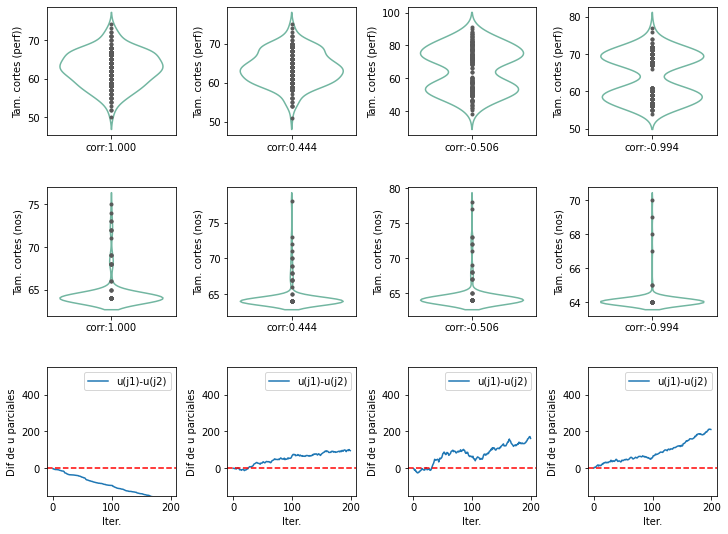

In [3]:

gustos = [
    ({'1': 10, '2': 3, '3': 1}, {'1': 10, '2': 3, '3': 1}),
    ({'1': 100, '2': 8, '3': 1}, {'1': 1, '2': 0, '3': 1}),
    ({'1': 10000, '2': 8, '3': 1}, {'1': 1, '2': 8, '3': 1000}),
    ({'1': 10, '2': 2, '3': 1}, {'1': 1, '2': 8, '3': 10}),
]


gs = GridSpec(3, 4, width_ratios=[1, 1, 1, 1], height_ratios=[1, 1, 1])
fig = plt.figure(figsize=(12, 9))

shared_axs_0 = fig.add_subplot(gs[0, 0])
shared_axs_1 = fig.add_subplot(gs[1, 0])
shared_axs_2 = fig.add_subplot(gs[2, 0])

axs = [
    [shared_axs_0] + [fig.add_subplot(gs[0, i]) for i in range(1, 4)],
    [shared_axs_1] + [fig.add_subplot(gs[1, i]) for i in range(1, 4)],
    [shared_axs_2] + [fig.add_subplot(gs[2, i]) for i in range(1, 4)]
]

fig.subplots_adjust(hspace=0.4, wspace=0.4)

i = 0
size = 128
for gustos_jugador1, gustos_jugador2 in gustos:
    jugador1 = Jugador(gustos_jugador1, T=size)
    jugador2 = Jugador(gustos_jugador2, T=size)
    juego = Juego(size, 200, jugador1, jugador2)
    juego.jugar()
    print(stats.describe(juego.perfect_sizes))
    corr = np.corrcoef(np.fromiter(gustos_jugador1.values(), dtype='float'),
                      np.fromiter(gustos_jugador2.values(), dtype='float'))[0, 1]
    plot(juego, axs, i, corr)
    i += 1

for ax in axs[0]:
    for collection in ax.collections:
        if isinstance(collection, matplotlib.collections.PolyCollection):
            collection.set_edgecolor(collection.get_facecolor())
            collection.set_facecolor('none')
            
for ax in axs[1]:
    for collection in ax.collections:
        if isinstance(collection, matplotlib.collections.PolyCollection):
            collection.set_edgecolor(collection.get_facecolor())
            collection.set_facecolor('none')

plt.show()
